In [112]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np


In [134]:
'''
Get the number of words spoken by each person in an interview
'''
def get_speaker_counts(filename):
    filename = "./transcripts_notes_removed/" + filename
    with open(filename, 'r') as file:
        speakers = {}
        for line in file:
            initials = line[:6].split(": ")[0]
            if not initials:
                print("No initials found in a line of ", filename)
            elif initials in speakers.keys():
                speakers[initials] += len(line.split()) -1
            else:
                speakers[initials] = len(line.split()) -1
    return speakers

print(get_speaker_counts("ddr-phljacl-1-24-transcript.txt"))

{'RB': 3644, 'PU': 10099}


In [149]:
'''
Return a list of interviewer's initials
'''
def get_interviewer_initials(filename):
    speaker_counts = get_speaker_counts(filename)
    
    with open('metadata/interview_metadata.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['Filename'] == filename:
                num_interviewers = len(row['Interviewer'].split(","))
                interviewers= sorted(speaker_counts, key=speaker_counts.get)[:num_interviewers]
                return interviewers
                
print(get_interviewer_initials("ddr-densho-1000-432-transcript-3f9b7a89d0.txt"))


['I2', 'I1', 'TY']


In [98]:
'''
Helper functions to get interview metadata
'''

# Function to convert names to initials
def get_initials(name):
    return "".join([part[0].upper() for part in name.split()])

def get_interviewer_names(filename):
    df = pd.read_csv("./metadata/interview_metadata.csv")
    metadata = df[df['Filename'] == filename].iloc[0]
    return metadata['Interviewer'].split(",")

def get_date(filename):
    df = pd.read_csv("./metadata/interview_metadata.csv")
    metadata = df[df['Filename'] == filename].iloc[0]
    return metadata['Date']

def get_collection(filename):
    df = pd.read_csv("./metadata/interview_metadata.csv")
    metadata = df[df['Filename'] == filename].iloc[0]
    return metadata['Collection']

def get_narrator_birthday(filename):
    df = pd.read_csv("./metadata/interview_metadata.csv")
    metadata = df[df['Filename'] == filename].iloc[0]
    names = metadata['Narrator'].split(",")
    
    df2 = pd.read_csv("./metadata/bios.csv")
    df2_names = df2['Narrator'].to_list()
    birthdays = []
    for name in names: 
        if name in df2_names:
            metadata = df2[df2['Narrator'] == name].iloc[0]
            birthdays.append(metadata['Birthyear'])
    
    return birthdays
    
birthday = get_narrator_birthday("ddr-densho-1000-118-transcript-f9c855a292.txt")

        

In [154]:
'''
Create questions_full.csv with correct headers
'''
# Define the CSV file name
filename = "questions_full.csv"

# Define the headers
headers = ["Filename", "Date", "Initials", "Interviewer", "Birthyear", "Question", "Collection"]

# Create and write headers to the CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(headers)  # Write the header row

print(f"CSV file '{filename}' created successfully with headers: {headers}")

CSV file 'questions_full.csv' created successfully with headers: ['Filename', 'Date', 'Initials', 'Interviewer', 'Birthyear', 'Question', 'Collection']


In [155]:
'''
Write questions from ONE FIlE to questions.csv
'''
def write_questions(filename):
    interviewers = get_interviewer_initials(filename.split("/")[1])
    interviewer_names = get_interviewer_names(filename.split("/")[1])
    date = get_date(filename.split("/")[1])
    collection = get_collection(filename.split("/")[1])
    
    num_narrators = len(get_speaker_counts(filename.split("/")[1])) - len(interviewers)
    if num_narrators == 1:
        birthyear = get_narrator_birthday(filename.split("/")[1])
    else:
        birthyear = None
    if birthyear:
        birthyear = birthyear[0]

    with open(filename, 'r') as file:
        for line in file:
            initials = line.split(": ", 1)[0].strip()
            if initials in interviewers:
                text = line.split(": ", 1)[1].strip()
                
                # Only write questions that are more than two words
                if len(text.split()) > 2:
                    if len(interviewer_names)==1:
                        name = interviewer_names[0]
                    else: 
                        guess_initials =  [get_initials(name) for name in interviewer_names]
                        if initials in guess_initials:
                            i = guess_initials.index(initials)
                            name = interviewer_names[i]
                        else:
                            name = ""
                            print(filename, initials)
                    new_row = [filename.split("/")[-1], date, initials, name, birthyear, text, collection]
                    
                    # Open the file in append mode
                    with open('questions_full.csv', 'a', newline='') as out_file:
                        writer = csv.writer(out_file, quoting=csv.QUOTE_ALL)
                        writer.writerow(new_row)
                
#write_questions("./transcripts_notes_removed/ddr-densho-1000-118-transcript-f9c855a292.txt")

In [156]:
'''
Create questions file for ENTIRE collection
'''
# Run to get metadata
ct=0
directory = 'transcripts_notes_removed'
for filename in os.listdir(directory):
     filepath = os.path.join(directory, filename)
     if os.path.isfile(filepath):
         if filename != ".DS_Store":
             print(filepath)
             result = write_questions(filepath)

transcripts_notes_removed/ddr-densho-1000-509-transcript.txt
transcripts_notes_removed/ddr-densho-1004-19-transcript-b1d9fcc948.txt
transcripts_notes_removed/ddr-densho-1000-99-transcript-4f66645f6c.txt
transcripts_notes_removed/ddr-densho-1001-28-transcript-dd90bf2a48.txt
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-jamsj-2-8-transcript-3c792d42de.txt TOM
transcripts_notes_removed/ddr-

(134114, 7)
ddr-densho-1000-2-transcript-b1c658930f.txt
This is what Mr. Omura answered, and I want you to kinda to comment about what your feelings were when you received this letter back. He writes to you on July 10, 1944, so you're still at Minidoka at that time. He said: "My dear Mr. Akutsu. I have your second letter of June 27, 1944, and in regards to your inquiry as to my opinion as to whether you could be charged with removing government property, I have the following observations to make. The position of American citizens of Japanese lineal descent since the outbreak of hostilities between the Japanese Emperor and the United States on December 7, 1941 has been a most precarious one in regards to civil rights and constitutional procedures. This is particularly noted in the manner in which the military summarily evacuated approximately 120,000 persons of Japanese descent, the great majority of whom were citizens from the Pacific coast and bundled them off to war borne relocation 

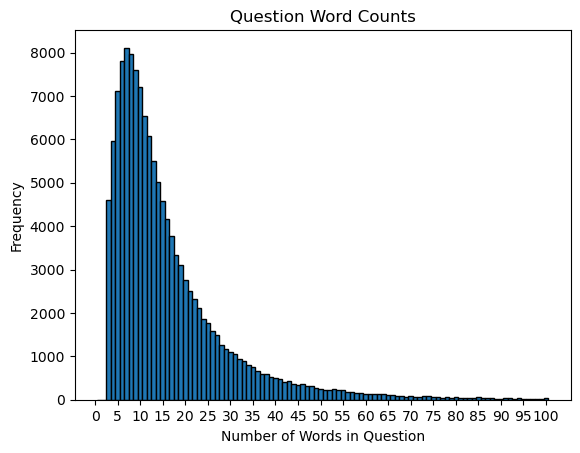

In [167]:
'''
Misc validation of questions_full
'''

df = pd.read_csv("questions_full.csv")
print(df.shape)
questions = df["Question"].to_list()
lengths = []
bad = []
for question in questions:
    lengths.append(len(question.split()))
    if len(question.split()) > 600:
        bad.append(df[df["Question"]==question].iloc[0]["Filename"])
        print(df[df["Question"]==question].iloc[0]["Filename"])
        print(question)
        print()
for file in set(bad):
    print(file)
print(f"Min: {min(lengths)}, Max: {max(lengths)}")

# Create histogram with 1-bin width for each integer from 1 to 100
plt.hist(lengths, bins=range(1, 102), edgecolor='black', align='left')

# Set ticks to show every integer from 1 to 100 (optional, but might clutter)
plt.xticks(range(0, 101, 5))  # Rotate for better readability

plt.xlabel("Number of Words in Question")
plt.ylabel("Frequency")
plt.title("Question Word Counts")
plt.show()
